<a href="https://colab.research.google.com/github/mathewsrc/Natural-Language-Processing-in-Python/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

**The goal of sentiment analysis is to automatically classify the sentiment of a text as positive, negative, or neutral, or to assign sentiment scores to indicate the intensity or polarity of the sentiment.**

**Applications**

- Social media monitoring
- Brand monitoring
- Marketing Analytics
- Product Analytics

In [1]:
%%capture
!pip install datasets #Hugging Face datasets
!pip install polars

In [23]:
import polars as pl
import pandas as pd

In [3]:
from datasets import load_dataset

# Load dataset from Hugging Face
reviews = load_dataset("rotten_tomatoes")

# Print column names
reviews.column_names

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Dataset rotten_tomatoes downloaded and prepared to /root/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

{'train': ['text', 'label'],
 'validation': ['text', 'label'],
 'test': ['text', 'label']}

In [4]:
# Get training data
training = reviews["train"]

# Convert Dataset to Pandas
training = training.to_pandas()
training_pl = pl.from_pandas(training)
training_pl.head()

text,label
str,i64
"""the rock is de…",1
"""the gorgeously…",1
"""effective but …",1
"""if you sometim…",1
"""emerges as som…",1


Couting the number of negative and positive reviews and their proportion

In [5]:
%%time
print('Number of positive and negative reviews: ', training.label.value_counts())
print('Proportion of positive and negative reviews: ', training.label.value_counts() / len(training))

Number of positive and negative reviews:  1    4265
0    4265
Name: label, dtype: int64
Proportion of positive and negative reviews:  1    0.5
0    0.5
Name: label, dtype: float64
CPU times: user 4.22 ms, sys: 0 ns, total: 4.22 ms
Wall time: 4.37 ms


In [6]:
%%time
print('Number of positive and negative reviews: ', training_pl['label'].value_counts())
print('Proportion of positive and negative reviews: ', training_pl['label'].value_counts() / len(training_pl))

Number of positive and negative reviews:  shape: (2, 2)
┌───────┬────────┐
│ label ┆ counts │
│ ---   ┆ ---    │
│ i64   ┆ u32    │
╞═══════╪════════╡
│ 0     ┆ 4265   │
│ 1     ┆ 4265   │
└───────┴────────┘
Proportion of positive and negative reviews:  shape: (2, 2)
┌──────────┬────────┐
│ label    ┆ counts │
│ ---      ┆ ---    │
│ f64      ┆ f64    │
╞══════════╪════════╡
│ 0.0      ┆ 0.5    │
│ 0.000117 ┆ 0.5    │
└──────────┴────────┘
CPU times: user 6.63 ms, sys: 1.09 ms, total: 7.72 ms
Wall time: 74.2 ms


Longest and shortest reviews

In [7]:
%%time
length_reviews = training.text.str.len()
print(max(length_reviews))
print(min(length_reviews))

267
4
CPU times: user 3.67 ms, sys: 1.95 ms, total: 5.62 ms
Wall time: 6.41 ms


In [8]:
%%time
length_reviews = training_pl['text'].str.lengths() # or n_chars()
print(max(length_reviews))
print(min(length_reviews))

267
4
CPU times: user 16.5 ms, sys: 0 ns, total: 16.5 ms
Wall time: 16.7 ms


## Types of Sentiment Analysis algorithms

- Rule/lexicon-based
  Contains a list of predefined words and score
  nice +2, good +1, terrible -3
  - To get the total valence we sum the words in a setence

- Automatic/ Machine Learning
  - Rely on having labelled historical data

In [9]:
text = """In a bustling city, there was a promising young musician named
 Alex. He dedicated his life to his passion for music, pouring his heart
 and soul into every note he played. Alex dreamt of sharing his melodies
 with the world, but his dreams were shattered when he lost his hearing
 in a tragic accident. Devastated, he spiraled into a deep sadness and
 isolated himself from the world he once loved. Unable to communicate
 through music, Alex felt a profound sense of loss and loneliness.
 However, with the support of a few close friends, he slowly began
 to rediscover his purpose. Through sign language and visual
 expressions, Alex found a new way to connect with others and express
 his emotions. Although his journey was filled with pain, he became
 an inspiration to many, teaching them the importance of resilience
 and the ability to
 find beauty in the midst of sorrow.
"""

In [10]:
from textblob import TextBlob

# Happy history
blob = TextBlob(text)
print("Sentiment: ", blob.sentiment)

Sentiment:  Sentiment(polarity=0.028438228438228432, subjectivity=0.5157342657342657)


## **Word Cloud**

Pros

- Can reveal the essential
- Provide an overall sense of the text
- Easy to grasp and engaging

Cons

- Sometimes confusing


In [11]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

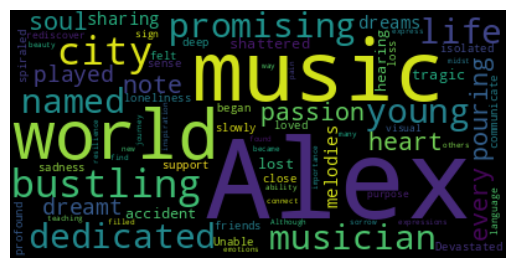

In [12]:
cloud_text = WordCloud(colormap="viridis").generate(text)
plt.imshow(cloud_text, interpolation="bilinear")
plt.axis("off")
plt.show()

## Stop Words

Frequent words that are not very informative
- Defined stop words (the, or, and, for, but)
- Context matters stop words

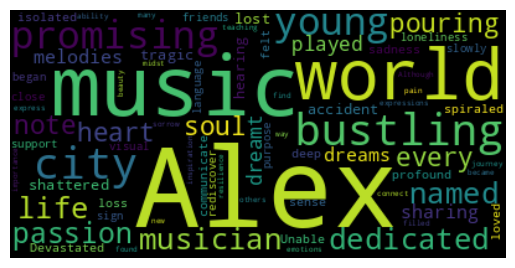

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stop_words = set(STOPWORDS)
stop_words.update(["movies", "movie", "film", "films"])

cloud_text = WordCloud(colormap="viridis", stopwords=stop_words).generate(text)
plt.imshow(cloud_text, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

stop_words = list(ENGLISH_STOP_WORDS) + ["film", "films", "movie", "movies"]

vect = CountVectorizer(stop_words=stop_words, max_features=1000)
vect.fit(training_pl["text"].to_numpy())
X = vect.transform(training_pl["text"].to_numpy())

x_array = X.toarray()
feature_names = vect.get_feature_names_out()

pd.DataFrame(x_array, columns=feature_names).head(5)

,10,2002,90,ability,able,absolutely,absorbing,accessible,act,acted,...,writing,written,wrong,ya,yarn,year,years,yes,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Columns = features
Rows = documents
Values = terms frequency

## String operators

In [30]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse", "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?", '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']


In [33]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


## Stemming vs Lemmarization

Stemming is the process of transforming words into their root forms.

Lemmatization is the process of reducing words into a root that are valid words in the language. Depend on the part-of-speech

Example:

Stemming
staying, stays, stayed -> stay
house, houses, housing -> hous (observe that hous is not a valid word)

Lemmaization
staying, stays, stayed -> stay
house, houses, housing -> house (observe that house is a valid word)

### Stemming

In [49]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

porter.stem("house")

'hous'

In [48]:
# multiple language stemmer
from nltk.stem.snowball import SnowballStemmer

duchstemmer = SnowballStemmer("dutch")
duchstemmer.stem("beginnen")

'beginn'

In [40]:
# Transform the array of tweets to tokens
tokens = [word_tokenize(item) for item in tweets_list]

# Stem
stems = [[porter.stem(word) for word in item] for item in tokens]
print([" ".join(word) for word in stems])

["@ virginamerica it 's realli aggress to blast obnoxi 'entertain ' in your guest ' face & amp ; they have littl recours", "@ virginamerica hey , first time flyer next week - excit ! but i 'm have a hard time get my flight ad to my elev account . help ?", '@ unit chang made in just over 3 hour . for someth that should have taken second onlin , i am not thrill . love the agent , though .']


### Lemmatization

In [47]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wn = WordNetLemmatizer()

wn.lemmatize("Wonderful", pos='a')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'Wonderful'

## TF-IDF

TF (Term frequency) - Tells how often a given word appears within a document in the corpus

IDF (Inverse document frequency) - Log-ratio between the total number of documents and the number of documents that contain a specific word

Words score

tf-idf = term frequency * inverse document frequency

The TF-IDF capture words common within a document but not across documents.

High words frequency and across documents -> Low score
Rare words across documents -> High score

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

# Fit and transform text into a sparse-matrix (matrix with mostly zero values, storing only non zero values)
vect.fit(training_pl["text"].to_numpy())
sparse_matrix = vect.transform(training_pl["text"].to_numpy())

pd.DataFrame(sparse_matrix.toarray(), columns=vect.get_feature_names_out()).head(5)

,00,007,10,100,101,102,104,105,10th,11,...,zucker,zwick,zzzzzzzzz,às,ápice,ótimo,último,últimos,única,único
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Columns = features
Rows = documents
Values = TF-IDF score